# **Import Data**

In [0]:
file = "dbfs:/FileStore/ratings.dat"
ratingsSchema = "UserID int, MovieID int, rating int, timestamp int"
ratings_df = spark.read.option("delimiter", "::").csv(file,schema=ratingsSchema)

display(ratings_df.limit(10))
ratings_df.printSchema()

UserID,MovieID,rating,timestamp
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
1,1197,3,978302268
1,1287,5,978302039
1,2804,5,978300719
1,594,4,978302268
1,919,4,978301368


root
 |-- UserID: integer (nullable = true)
 |-- MovieID: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- timestamp: integer (nullable = true)



In [0]:
file = "dbfs:/FileStore/users.dat"
userSchema = "UserID int, gender string, age int, occupation int, zipCode string"
user_df = spark.read.option("delimiter", "::").csv(file,schema=userSchema)

display(user_df.limit(10))
user_df.printSchema()

UserID,gender,age,occupation,zipCode
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
7,M,35,1,06810
8,M,25,12,11413
9,M,25,17,61614
10,F,35,1,95370


root
 |-- UserID: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- occupation: integer (nullable = true)
 |-- zipCode: string (nullable = true)



In [0]:
file = "dbfs:/FileStore/movies.dat"
movieSchema = "MovieID int, title string, genres string"
movie_df = spark.read.option("delimiter", "::").csv(file,schema=movieSchema)

display(movie_df.limit(10))
movie_df.printSchema()

MovieID,title,genres
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children's
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


root
 |-- MovieID: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



In [0]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# **EDA**

## **Users**

In [0]:
user_df_pd = user_df.toPandas()
user_df_pd.nunique()

Out[5]: UserID        6040
gender           2
age              7
occupation      21
zipCode       3439
dtype: int64

In [0]:
user_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int32 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int32 
 3   occupation  6040 non-null   int32 
 4   zipCode     6040 non-null   object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


## **Movies**

In [0]:
movie_df_pd = movie_df.toPandas()
movie_df_pd.nunique()

Out[7]: MovieID    3883
title      3883
genres      301
dtype: int64

In [0]:
movie_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


## **Ratings**

In [0]:
ratings_df_pd = ratings_df.toPandas()
ratings_df_pd.nunique()

Out[9]: UserID         6040
MovieID        3706
rating            5
timestamp    458455
dtype: int64

In [0]:
ratings_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int32
 1   MovieID    1000209 non-null  int32
 2   rating     1000209 non-null  int32
 3   timestamp  1000209 non-null  int32
dtypes: int32(4)
memory usage: 15.3 MB


Let's answer some questions:  
1) Which movies had no ratings?  
2) Show distribution of ratings  
3) What are the highest and lowest rated movies?

In [0]:
#Movies with no ratings
from pyspark.sql.functions import desc,column

ratings_count = ratings_df.select('MovieID','rating').groupBy('MovieID').count().orderBy(desc('count'))
joined_tbl = ratings_count.join(movie_df,ratings_count.MovieID == movie_df.MovieID,'right')
joined_tbl.select('title','count').where(column('count').isNull()).show(joined_tbl.count())
#joined_tbl.count()

+--------------------+-----+
|               title|count|
+--------------------+-----+
|Hellhounds on My ...| null|
|Three Lives and O...| null|
|Stacy's Knights (...| null|
|Symphonie pastora...| null|
|Crows and Sparrow...| null|
|Empty Mirror, The...| null|
|Eye of Vichy, The...| null|
|  Easy Virtue (1927)| null|
|Happiness Is in t...| null|
|Quartier Mozart (...| null|
|Train Ride to Hol...| null|
|Anguish (Angustia...| null|
|Children Are Watc...| null|
|Jails, Hospitals ...| null|
|Ill Gotten Gains ...| null|
|  Two Friends (1986)| null|
|   Babymother (1998)| null|
|Little Bit of Sou...| null|
|Photographer (Fot...| null|
|     Knockout (1999)| null|
|Mountain Eagle, T...| null|
|    Garcu, Le (1995)| null|
|     Floating (1997)| null|
|       Taxman (1999)| null|
|     Hedd Wyn (1992)| null|
|Beyond Bedlam (1993)| null|
|    Criminals (1996)| null|
|  War Stories (1995)| null|
|Woman in Question...| null|
|  Asfour Stah (1990)| null|
|Every Other Weeke...| null|
|Und keiner we

Out[12]: array([[<AxesSubplot:title={'center':'MovieID'}>,
        <AxesSubplot:title={'center':'rating'}>]], dtype=object)

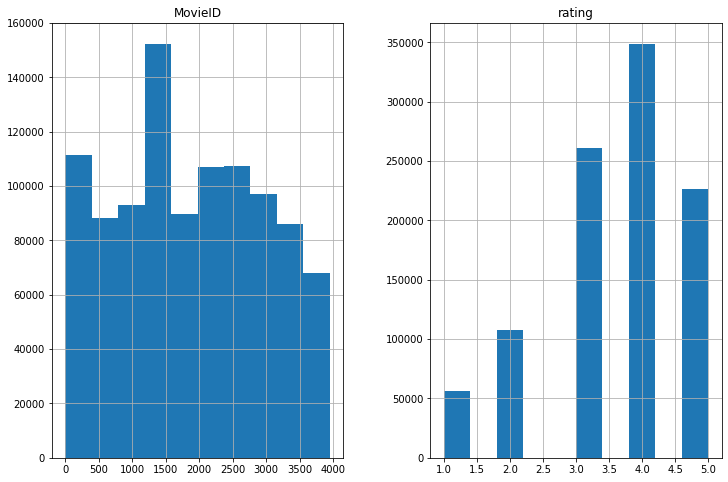

In [0]:
#Distribution of Ratings
ratings_df_pd[['MovieID','rating']].hist(figsize=(12,8),layout=(1,2))

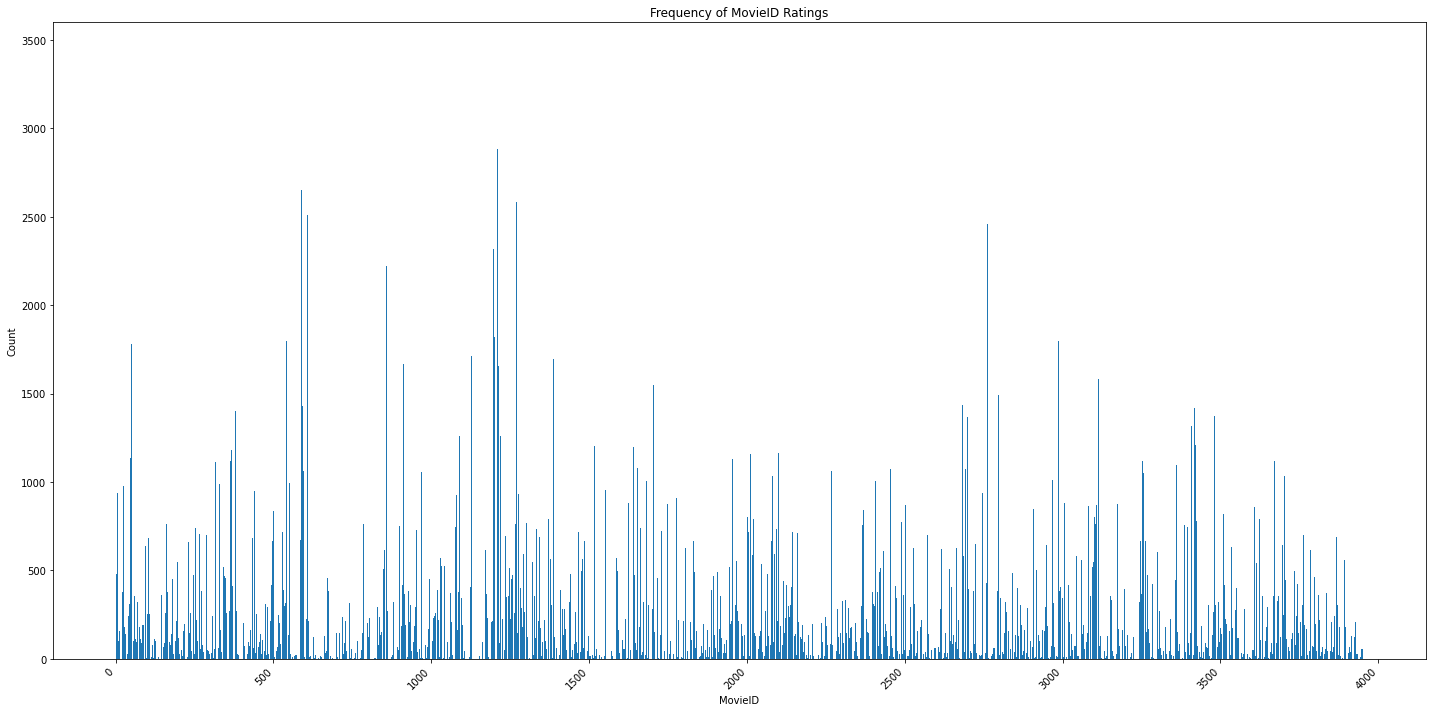

In [0]:
import matplotlib.pyplot as plt2
#Barplot of Movie Ids
df = ratings_count.toPandas()
fig, ax = plt2.subplots(figsize=(20, 10))  # Adjust figsize as needed

df_bar = ax.bar(df['MovieID'], df['count']) # Use ax.bar directly

# Set labels and title
ax.set_xlabel('MovieID')
ax.set_ylabel('Count')
ax.set_title('Frequency of MovieID Ratings') # Added a more descriptive title

# Rotate x-axis labels for better readability with many labels
plt2.xticks(rotation=45, ha='right')

# Adjust plot to prevent labels from being cut off
plt2.tight_layout()

# Display the plot
plt2.show()

In [0]:
#Highest Rated Movies
from pyspark.sql import functions
ratings_average = ratings_df.select('MovieID','rating').groupBy('MovieID').agg(functions.mean('rating').alias('average_rating')).orderBy(desc('average_rating'))
joined_tbl = ratings_average.join(movie_df,ratings_average.MovieID == movie_df.MovieID,'left')
joined_tbl.select('title','average_rating').orderBy(desc('average_rating')).show(10)

+--------------------+--------------+
|               title|average_rating|
+--------------------+--------------+
|Gate of Heavenly ...|           5.0|
|    Baby, The (1973)|           5.0|
|Schlafes Bruder (...|           5.0|
|Follow the Bitch ...|           5.0|
|Bittersweet Motel...|           5.0|
|Ulysses (Ulisse) ...|           5.0|
|Smashing Time (1967)|           5.0|
|One Little Indian...|           5.0|
|Song of Freedom (...|           5.0|
|        Lured (1947)|           5.0|
+--------------------+--------------+
only showing top 10 rows



In [0]:
#Lowest Rated Movies
joined_tbl.select('title','average_rating').orderBy('average_rating').show(10)

+--------------------+--------------+
|               title|average_rating|
+--------------------+--------------+
|McCullochs, The (...|           1.0|
|Wirey Spindell (1...|           1.0|
|Bloody Child, The...|           1.0|
|Uninvited Guest, ...|           1.0|
|    Diebinnen (1995)|           1.0|
|Shadows (Cienie) ...|           1.0|
|Low Life, The (1994)|           1.0|
|    Sleepover (1995)|           1.0|
|Little Indian, Bi...|           1.0|
|Blood Spattered B...|           1.0|
+--------------------+--------------+
only showing top 10 rows



# **Collaborative Filtering**

In [0]:
#Create Training and Testing Datasets
ratings = ratings_df.drop('timestamp')
train_df, test_df = ratings.randomSplit([0.8, 0.2],seed=42)
print(train_df.count())
print(test_df.count())

800092
200117


In [0]:
train_df.show()

+------+-------+------+
|UserID|MovieID|rating|
+------+-------+------+
|     1|      1|     5|
|     1|     48|     5|
|     1|    260|     4|
|     1|    527|     5|
|     1|    531|     4|
|     1|    594|     4|
|     1|    608|     4|
|     1|    661|     3|
|     1|    720|     3|
|     1|    745|     3|
|     1|    914|     3|
|     1|    919|     4|
|     1|    938|     4|
|     1|   1022|     5|
|     1|   1028|     5|
|     1|   1035|     5|
|     1|   1097|     4|
|     1|   1193|     5|
|     1|   1207|     4|
|     1|   1246|     4|
+------+-------+------+
only showing top 20 rows



In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
#Using ALS Algorithm to create user/item matrix
als = ALS(userCol='UserID',itemCol='MovieID',ratingCol='rating')

paramGrid_als = (ParamGridBuilder()
             .addGrid(als.regParam, [0.01, 0.1, 1.0])
             .addGrid(als.maxIter, [5, 10, 20])
             .build())

In [0]:
evaluator = RegressionEvaluator().setMetricName("rmse").setLabelCol("rating").setPredictionCol("prediction")
cv = CrossValidator().setEstimator(als).setEvaluator(evaluator).setEstimatorParamMaps(paramGrid_als).setNumFolds(3)

In [0]:
cvModel = cv.fit(train_df)

In [0]:
cvPred = cvModel.transform(test_df)

In [0]:
from pyspark.sql.types import FloatType
cvPred_casted = cvPred.withColumn("rating", column("rating").cast(FloatType())).withColumn("prediction", column("prediction").cast(FloatType()))

In [0]:
from pyspark.sql.functions import col, isnan
test = cvPred_casted.toPandas()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200117 entries, 0 to 200116
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UserID      200117 non-null  int32  
 1   MovieID     200117 non-null  int32  
 2   rating      200117 non-null  float32
 3   prediction  200082 non-null  float32
dtypes: float32(2), int32(2)
memory usage: 3.1 MB


In [0]:
test = test.dropna()
cvPred_filtered = spark.createDataFrame(test)
RMSE = evaluator.evaluate(cvPred_filtered)
display(RMSE)

0.8956718903496668

# **Make Predictions**

In [0]:
dbutils.widgets.text("User","", "Select a User to Make Predictions for")

In [0]:
prediction_choice = dbutils.widgets.get("User")
print(f"You entered: {prediction_choice}")

You entered: 6000


In [0]:
prediction_choice_int = int(prediction_choice)

In [0]:
from pyspark.sql.functions import lit
#Create Prediction Dataframe
movies_not_watched_ID = ratings_df.select('MovieID').where(column('UserID')!=prediction_choice_int)
movies_not_watched = movies_not_watched_ID.join(movie_df,movies_not_watched_ID.MovieID == movie_df.MovieID,'left').select(movies_not_watched_ID.MovieID, movie_df.title).withColumn('UserID',lit(prediction_choice_int))
display(movies_not_watched)

MovieID,title,UserID
1193,One Flew Over the Cuckoo's Nest (1975),6000
661,James and the Giant Peach (1996),6000
914,My Fair Lady (1964),6000
3408,Erin Brockovich (2000),6000
2355,"Bug's Life, A (1998)",6000
1197,"Princess Bride, The (1987)",6000
1287,Ben-Hur (1959),6000
2804,"Christmas Story, A (1983)",6000
594,Snow White and the Seven Dwarfs (1937),6000
919,"Wizard of Oz, The (1939)",6000


In [0]:
Num_Movies_watched = ratings_df.select('MovieID').where(column('UserID')==prediction_choice_int).count()
Num_Movies_not_watched = ratings_df.select('MovieID').where(column('UserID')!=prediction_choice_int).count()
print(f"Number of movies watched by User_{prediction_choice_int} is {Num_Movies_watched}")
print(f"Number of movies not watched by User_{prediction_choice_int} is {Num_Movies_not_watched}")
print(f"Total Movies = {Num_Movies_watched + Num_Movies_not_watched}")

Number of movies watched by User_6000 is 506
Number of movies not watched by User_6000 is 999703
Total Movies = 1000209


In [0]:
#Top Rated Movies by User
top_rated_movies = ratings_df.where(column('UserID')==prediction_choice_int).join(movie_df,movies_not_watched_ID.MovieID == movie_df.MovieID,'left').select(ratings_df.MovieID, movie_df.title,ratings_df.rating).orderBy(desc('rating'))
display(top_rated_movies)

MovieID,title,rating
589,Terminator 2: Judgment Day (1991),5
590,Dances with Wolves (1990),5
3035,Mister Roberts (1955),5
923,Citizen Kane (1941),5
2406,Romancing the Stone (1984),5
3066,Tora! Tora! Tora! (1970),5
3068,"Verdict, The (1982)",5
2423,Christmas Vacation (1989),5
2433,"Civil Action, A (1998)",5
969,"African Queen, The (1951)",5


In [0]:
prediction_by_user = cvModel.transform(movies_not_watched).na.drop()

In [0]:
topPredictions = prediction_by_user.select('title','prediction').dropDuplicates(['title']).orderBy(desc('prediction'))
display(topPredictions)

title,prediction
And the Ship Sails On (E la nave va) (1984),5.2789464
I Am Cuba (Soy Cuba/Ya Kuba) (1964),5.271455
Saludos Amigos (1943),5.142636
"Midaq Alley (Callej�n de los milagros, El) (1995)",5.138404
Land and Freedom (Tierra y libertad) (1995),5.0840893
"Reluctant Debutante, The (1958)",5.0311823
Return with Honor (1998),5.0245185
"Boys of St. Vincent, The (1993)",4.7035265
Deterrence (1998),4.636661
Two Family House (2000),4.621073
